In [1]:
# Import Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# Regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR

### 1. Import Dataset 
Data Description:
* Collected undergraduate student applicant data from the Kansas State University Student Information System (KSIS) 
* Student applicant demographics
* Years: 2012 through 2019

Data Fields:
> * Student ID: equivalent to primary key identifier
> * State: continental US States only
> * Age 
> * Gender
> * Citizenship
> * Ethnicity: as given by student during application process
> * Residency: IS = In-State (KS); OS = Out of State (non-KS)
> * Admit Term
> * College: college and program that student has applied to
> * Degree / Non-Degree: status of application for degree program vs. non-degree program (e.g. certificate)
> * Application Center: K-State campust to which student has applied
> * Admit Type: traditional freshmen, re-admits, online students, or transfer students
> * Status: current status of student's application / program 
> * Application Date: date when application was submitted to / received by K-State
> * Admit Date: date when student was admitted to K-State and into college/program
> * Admit Status: if admit date exists = 'Admitted', otherwise: 'Not Admitted'
> * Enrollment Date: date when student first enrolled into courses at K-State
> * Enrolled Status: if enrollment date exists = 'Enrolled', otherwise: 'Not Enrolled'
> * Withdrew?: did the student at any point withdraw after having been admitted

Pre-Processing Steps:
* Data pre-cleaned via Excel:
> * Verified data consistency, integrity, and accuracy
> * Deleted identifing information and non-demographic data
> * Original 182 data points reduced to 19

In [2]:
# Read and save master data file to continue processing
stdnt_data = pd.read_excel('Student Data 2012 - 2019.xlsx')
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Date,Admit Status,Enrollment Date,Enrolled Status,Withdrew?
0,132441,KS,70.0,M,,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16 00:00:00,2019-05-21 00:00:00,Admitted,,Not Enrolled,N
1,921672,CA,69.0,M,,White,OS,Fall 2019,Agriculture,Non-Degree,Global Campus,Online,Active,2019-07-25 00:00:00,2019-07-26 00:00:00,Admitted,,Not Enrolled,N
2,922050,KS,67.0,M,,White,IS,Fall 2019,Technology & Aviation,Non-Degree,Polytechnic,Freshman,Active,2019-08-05 00:00:00,2019-08-14 00:00:00,Admitted,2019-08-23 00:00:00,Enrolled,N
3,922182,KS,63.0,F,,White,IS,Fall 2019,Health & Human Sciences,Non-Degree,Global Campus,Transfer,Active,2019-08-07 00:00:00,2019-08-26 00:00:00,Admitted,,Not Enrolled,N
4,905009,KS,63.0,M,,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Readmit,Active,2019-05-21 00:00:00,2019-05-22 00:00:00,Admitted,2019-06-24 00:00:00,Enrolled,N


### 2. Data Transformation and Cleaning

In [3]:
# Verify data types in file
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132730 entries, 0 to 132729
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   132730 non-null  int64  
 1   State                131798 non-null  object 
 2   Age                  132727 non-null  float64
 3   Gender               132730 non-null  object 
 4   Citizenship          132730 non-null  object 
 5   Ethnicity            132730 non-null  object 
 6   Residency            132730 non-null  object 
 7   Admit Term           132730 non-null  object 
 8   College              132730 non-null  object 
 9   Degree / Non-Degree  132730 non-null  object 
 10  Application Center   132730 non-null  object 
 11  Admit Type           132730 non-null  object 
 12  Status               132730 non-null  object 
 13  Application Date     132730 non-null  object 
 14  Admit Date           132730 non-null  object 
 15  Admit Status     

In [4]:
# Fill cells with null values 
stdnt_data = stdnt_data.fillna({'State':'No State'})
stdnt_data = stdnt_data.fillna({'Enrollment Date':''})

In [5]:
# Find mean age to fill null value(s)
stdnt_data['Age'].mean()

20.635055414497426

In [6]:
# Replace null values with mean age (rounded)
stdnt_data = stdnt_data.fillna({'Age':21})

In [7]:
#Verify no remaining null values
stdnt_data.isnull().sum()

ID                     0
State                  0
Age                    0
Gender                 0
Citizenship            0
Ethnicity              0
Residency              0
Admit Term             0
College                0
Degree / Non-Degree    0
Application Center     0
Admit Type             0
Status                 0
Application Date       0
Admit Date             0
Admit Status           0
Enrollment Date        0
Enrolled Status        0
Withdrew?              0
dtype: int64

In [8]:
# Change data type of age from float to int 
stdnt_data['Age'] = stdnt_data['Age'].astype('int64')
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132730 entries, 0 to 132729
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   132730 non-null  int64 
 1   State                132730 non-null  object
 2   Age                  132730 non-null  int64 
 3   Gender               132730 non-null  object
 4   Citizenship          132730 non-null  object
 5   Ethnicity            132730 non-null  object
 6   Residency            132730 non-null  object
 7   Admit Term           132730 non-null  object
 8   College              132730 non-null  object
 9   Degree / Non-Degree  132730 non-null  object
 10  Application Center   132730 non-null  object
 11  Admit Type           132730 non-null  object
 12  Status               132730 non-null  object
 13  Application Date     132730 non-null  object
 14  Admit Date           132730 non-null  object
 15  Admit Status         132730 non-nu

In [9]:
# Basic statistics of numeric column 'Age'
stdnt_data['Age'].describe()

count    132730.000000
mean         20.635064
std           5.547404
min          13.000000
25%          18.000000
50%          18.000000
75%          21.000000
max          87.000000
Name: Age, dtype: float64

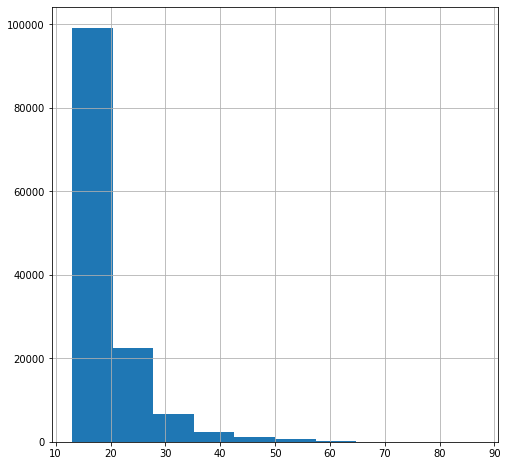

In [10]:
# Histogram of age distribution
stdnt_data['Age'].hist(figsize=(8,8))

> This visual shows that majority of students are around the age of 20 which agrees with out mean age of 20.64 years.

### 3. Verify Data Accuracy and Integrity
> Use of Group By to allow for quick overview of counts

In [11]:
# Grouping by admit status and enrolled status allows for counts and checking for inaccuracies;
# Students who are not admitted should not have an enrollment date; 
Adm_Enrolled = stdnt_data.groupby(['Admit Status', 'Enrolled Status']).size()
Adm_Enrolled

Admit Status  Enrolled Status
Admitted      Enrolled           51151
              Not Enrolled       55255
Not Admitted  Not Enrolled       26324
dtype: int64

> Results show that we have indeed no enrollments for non-admits

In [12]:
# Ensuring no withdrawals for non-admits
Adm_Withdr = stdnt_data.groupby(['Admit Status', 'Withdrew?']).size()
Adm_Withdr

Admit Status  Withdrew?
Admitted      N            105536
              Y               870
Not Admitted  N             26324
dtype: int64

> Results show that we have no withdrawals for non-admits and a total of 870 withdrawals for previously admitted students

### We now have a dataset that no longer contains any null values. The validity of the data has been verified by looking at groupings and counts and we can proceed with further analysis. 